In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

**Data Collection**

**Preeclampsia Dataset from *Kaggle* text**

In [55]:
# loading the diabetes dataset to a pandas DataFrame
P_data = pd.read_csv('preeclampsia.csv')

**Data Exploration**

In [56]:
# print the first 5 rows of the dataset
P_data.head()

,age,gest_age,height,weight,bmi,sysbp,diabp,hb,pcv,tsh,...,pp_13,glycerides,htn,diabetes,fam_htn,sp_art,occupation,diet,activity,sleep
0,28,11,152,97,28.508125,71,133,14.683883,39.232347,2.764080,...,61.197945,257.668101,0,0,1,0,1,0,2,1
1,28,12,157,70,27.606337,87,127,14.510683,38.215125,2.439556,...,95.611529,269.812342,1,0,1,1,2,1,2,2
2,21,11,173,98,25.673333,76,128,12.592319,39.245587,4.147177,...,26.671472,197.074922,1,1,0,1,2,0,1,1
3,30,12,148,65,27.367781,82,122,14.128237,37.276060,2.118313,...,83.365411,244.343060,0,0,0,0,0,0,0,0
4,23,11,157,71,21.585036,76,139,13.089027,40.280974,1.186492,...,117.633252,239.124513,1,1,1,0,1,1,2,2


In [57]:
# number of rows and Columns in this dataset
P_data.shape

(400, 25)

In [58]:
P_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         400 non-null    int64  
 1   gest_age    400 non-null    int64  
 2   height      400 non-null    int64  
 3   weight      400 non-null    int64  
 4   bmi         400 non-null    float64
 5   sysbp       400 non-null    int64  
 6   diabp       400 non-null    int64  
 7   hb          400 non-null    float64
 8   pcv         400 non-null    float64
 9   tsh         400 non-null    float64
 10  platelet    400 non-null    int64  
 11  creatinine  400 non-null    float64
 12  plgf:sflt   400 non-null    float64
 13  SEng        400 non-null    float64
 14  cysC        400 non-null    float64
 15  pp_13       400 non-null    float64
 16  glycerides  400 non-null    float64
 17  htn         400 non-null    int64  
 18  diabetes    400 non-null    int64  
 19  fam_htn     400 non-null    i

**Data Analysis**

In [59]:
P_data.describe()

,age,gest_age,height,weight,bmi,sysbp,diabp,hb,pcv,tsh,...,pp_13,glycerides,htn,diabetes,fam_htn,sp_art,occupation,diet,activity,sleep
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000,400.000000,400.000000
mean,26.202500,11.955000,156.597500,78.060000,26.273289,79.130000,129.405000,12.937193,40.839940,3.023791,...,78.962579,222.166343,0.540000,0.505000,0.505000,0.505000,1.005000,0.475,1.002500,1.042500
std,4.957109,0.824424,10.026556,18.666078,4.903385,5.627368,5.870872,1.655474,2.935408,1.154072,...,30.532076,27.864305,0.499022,0.500601,0.500601,0.500601,0.822598,0.500,0.786792,0.826075
min,18.000000,11.000000,140.000000,45.000000,18.035083,70.000000,120.000000,10.022332,36.025164,1.001712,...,25.250811,175.002075,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
25%,22.000000,11.000000,148.000000,63.000000,21.907631,74.000000,125.000000,11.717732,38.272878,2.117293,...,51.731418,198.583307,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
50%,26.000000,12.000000,156.000000,79.000000,26.105753,79.000000,129.000000,12.885031,40.605499,3.095682,...,80.981857,222.997238,1.000000,1.000000,1.000000,1.000000,1.000000,0.000,1.000000,1.000000
75%,31.000000,13.000000,166.000000,94.250000,30.483564,83.000000,134.000000,14.184205,43.263048,4.035256,...,105.624695,245.126051,1.000000,1.000000,1.000000,1.000000,2.000000,1.000,2.000000,2.000000
max,34.000000,13.000000,174.000000,109.000000,34.989928,89.000000,139.000000,15.973881,45.987111,4.994758,...,133.072790,269.812342,1.000000,1.000000,1.000000,1.000000,2.000000,1.000,2.000000,2.000000


In [60]:
P_data['htn'].value_counts()

,count
htn,
1,216
0,184


In [61]:
P_data.groupby('htn').mean()

,age,gest_age,height,weight,bmi,sysbp,diabp,hb,pcv,tsh,...,cysC,pp_13,glycerides,diabetes,fam_htn,sp_art,occupation,diet,activity,sleep
htn,,,,,,,,,,,,,,,,,,,,,
0,26.440217,11.918478,156.211957,79.000000,26.477874,79.423913,129.179348,12.916386,40.769676,2.960438,...,1.128732,79.530878,222.408199,0.527174,0.461957,0.489130,0.961957,0.472826,1.00000,1.125000
1,26.000000,11.986111,156.925926,77.259259,26.099014,78.879630,129.597222,12.954918,40.899795,3.077759,...,1.086642,78.478472,221.960317,0.486111,0.541667,0.518519,1.041667,0.476852,1.00463,0.972222


In [62]:
# separating the data and labels
X = P_data.drop(columns = 'htn', axis=1)
Y = P_data['htn']

In [63]:
print(X)

     age  gest_age  height  weight        bmi  sysbp  diabp         hb  \
0     28        11     152      97  28.508125     71    133  14.683883   
1     28        12     157      70  27.606337     87    127  14.510683   
2     21        11     173      98  25.673333     76    128  12.592319   
3     30        12     148      65  27.367781     82    122  14.128237   
4     23        11     157      71  21.585036     76    139  13.089027   
..   ...       ...     ...     ...        ...    ...    ...        ...   
395   24        12     146     100  22.661248     87    130  11.136807   
396   18        11     144      45  32.477823     81    124  10.425359   
397   25        11     145     107  18.335092     89    136  15.236094   
398   24        12     157      47  34.690710     72    120  15.618601   
399   24        11     151      65  25.276943     71    137  13.748172   

           pcv       tsh  ...      cysC       pp_13  glycerides  diabetes  \
0    39.232347  2.764080  ...  0.7

In [64]:
print(Y)

0      0
1      1
2      1
3      0
4      1
      ..
395    0
396    0
397    1
398    0
399    0
Name: htn, Length: 400, dtype: int64


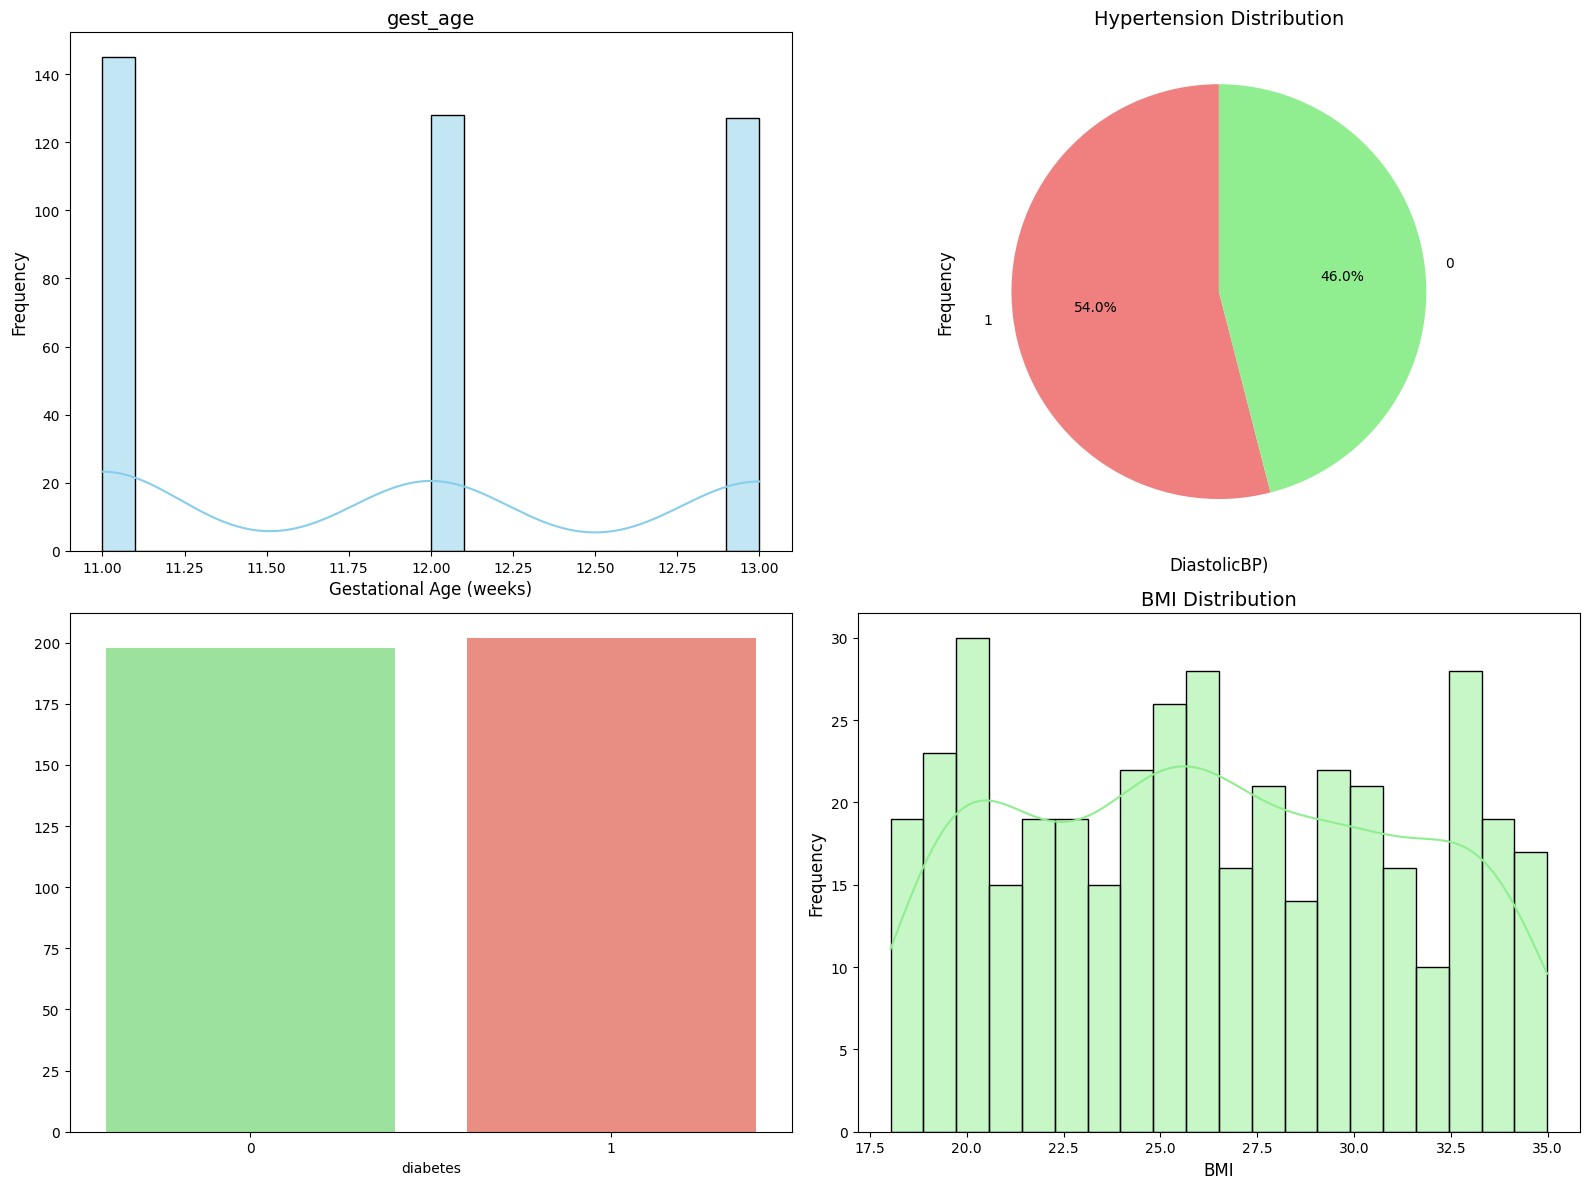

In [80]:
# Plotting stacked histograms for the feature variables
# Creating the combined visualizations of feature visualisations for better representation
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Gestational Age Distribution
sns.histplot(P_data['gest_age'], bins=20, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('gest_age', fontsize=14)
axes[0, 0].set_xlabel('Gestational Age (weeks)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)

# Plot 2: Diastolic BP Distribution
sns.histplot(P_data['sysbp'], bins=20, kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Diastolic BP Distribution (mmHg)', fontsize=14)
axes[0, 1].set_xlabel('DiastolicBP)', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)


# Plot 3: Diabetes Level on Admission Distribution
sns.barplot(x=diabetes_counts.index, y=diabetes_counts.values, ax=axes[1, 0],
            hue=diabetes_counts.index, palette=['lightgreen', 'salmon'], legend=False)

# Plot 4: BMI Distribution
sns.histplot(P_data['bmi'], bins=20, kde=True, ax=axes[1, 1], color='lightgreen')
axes[1, 1].set_title('BMI Distribution', fontsize=14)
axes[1, 1].set_xlabel('BMI', fontsize=12)
axes[1, 1].set_ylabel('Frequency', fontsize=12)

# Plot 5: Pie Chart for Hypertension (htn)
htn_counts = P_data['htn'].value_counts()
axes[0, 1].pie(htn_counts, labels=htn_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
axes[0, 1].set_title('Hypertension Distribution', fontsize=14)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Correlation Analysis of Variables

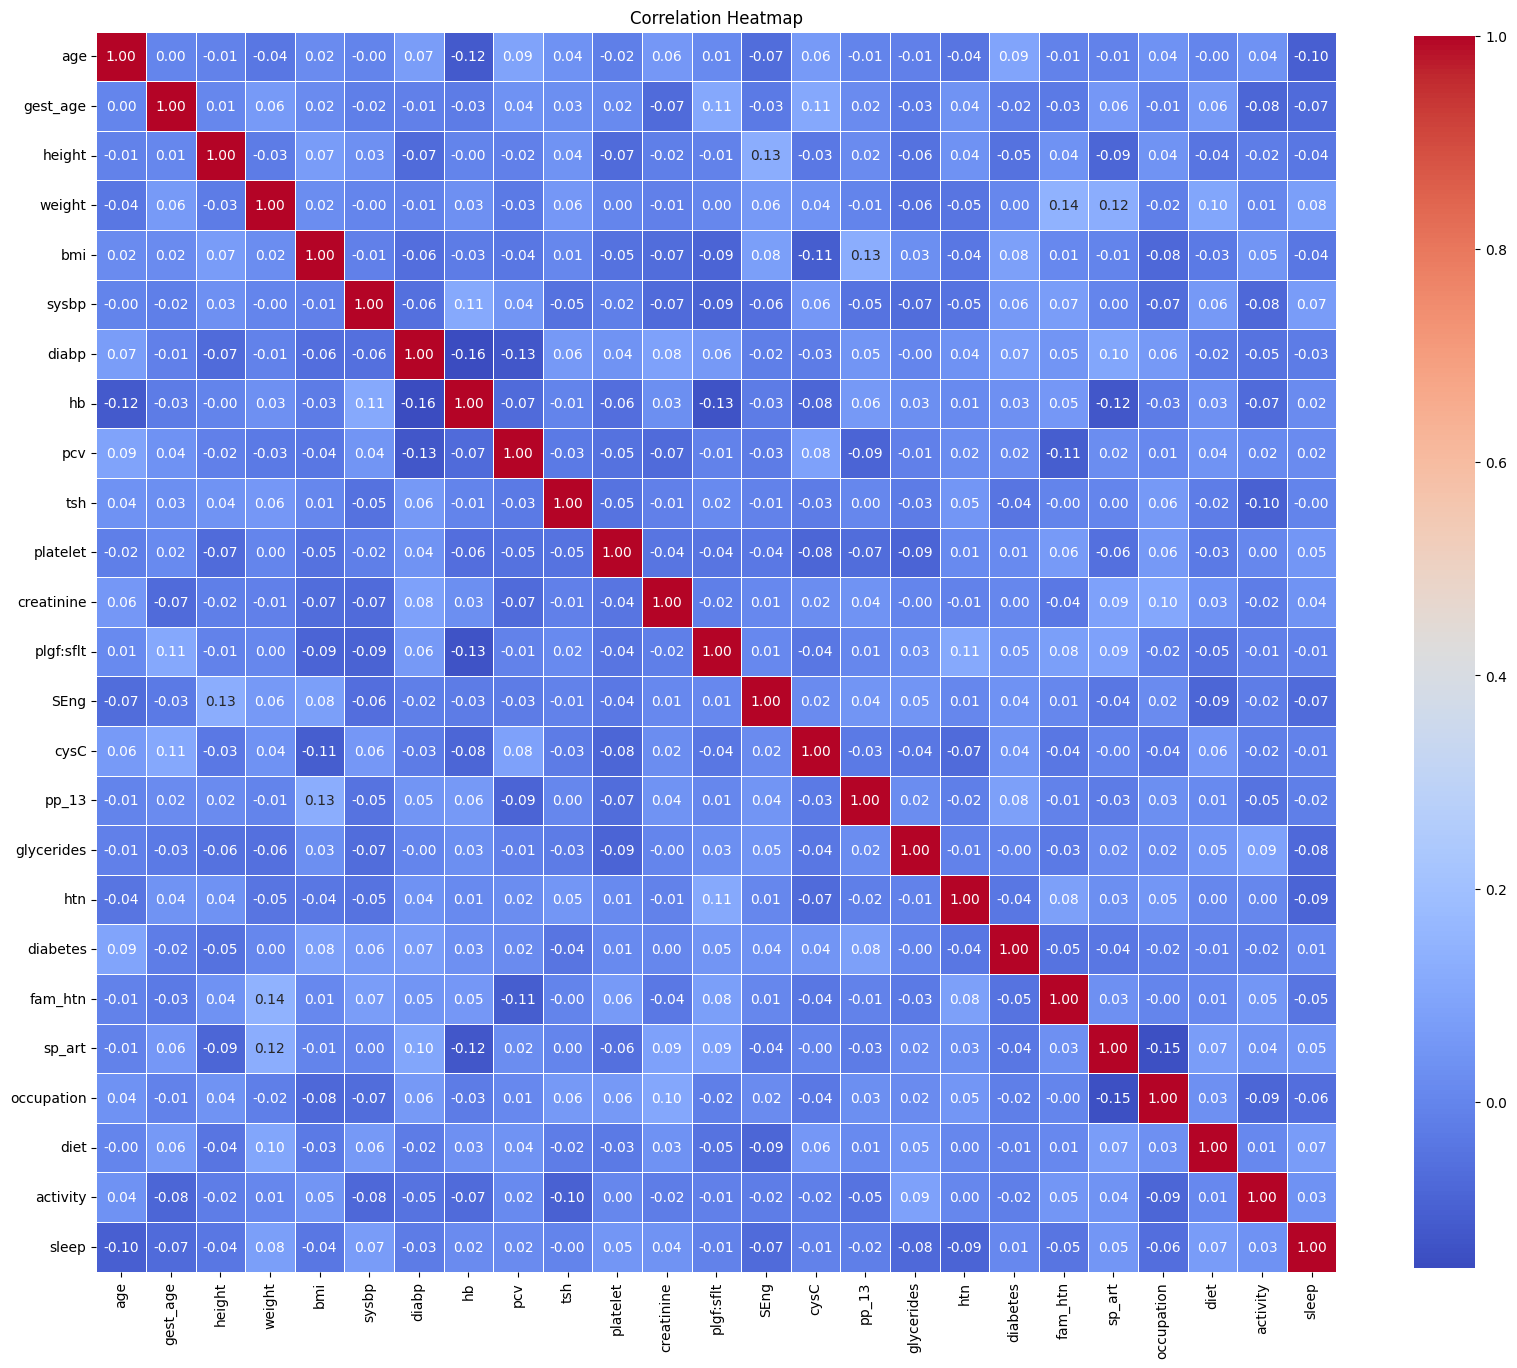

In [65]:
# Calculating the correlation matrix
correlation_matrix = P_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5, cbar_kws={"shrink": .8})

# Title for the heatmap
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

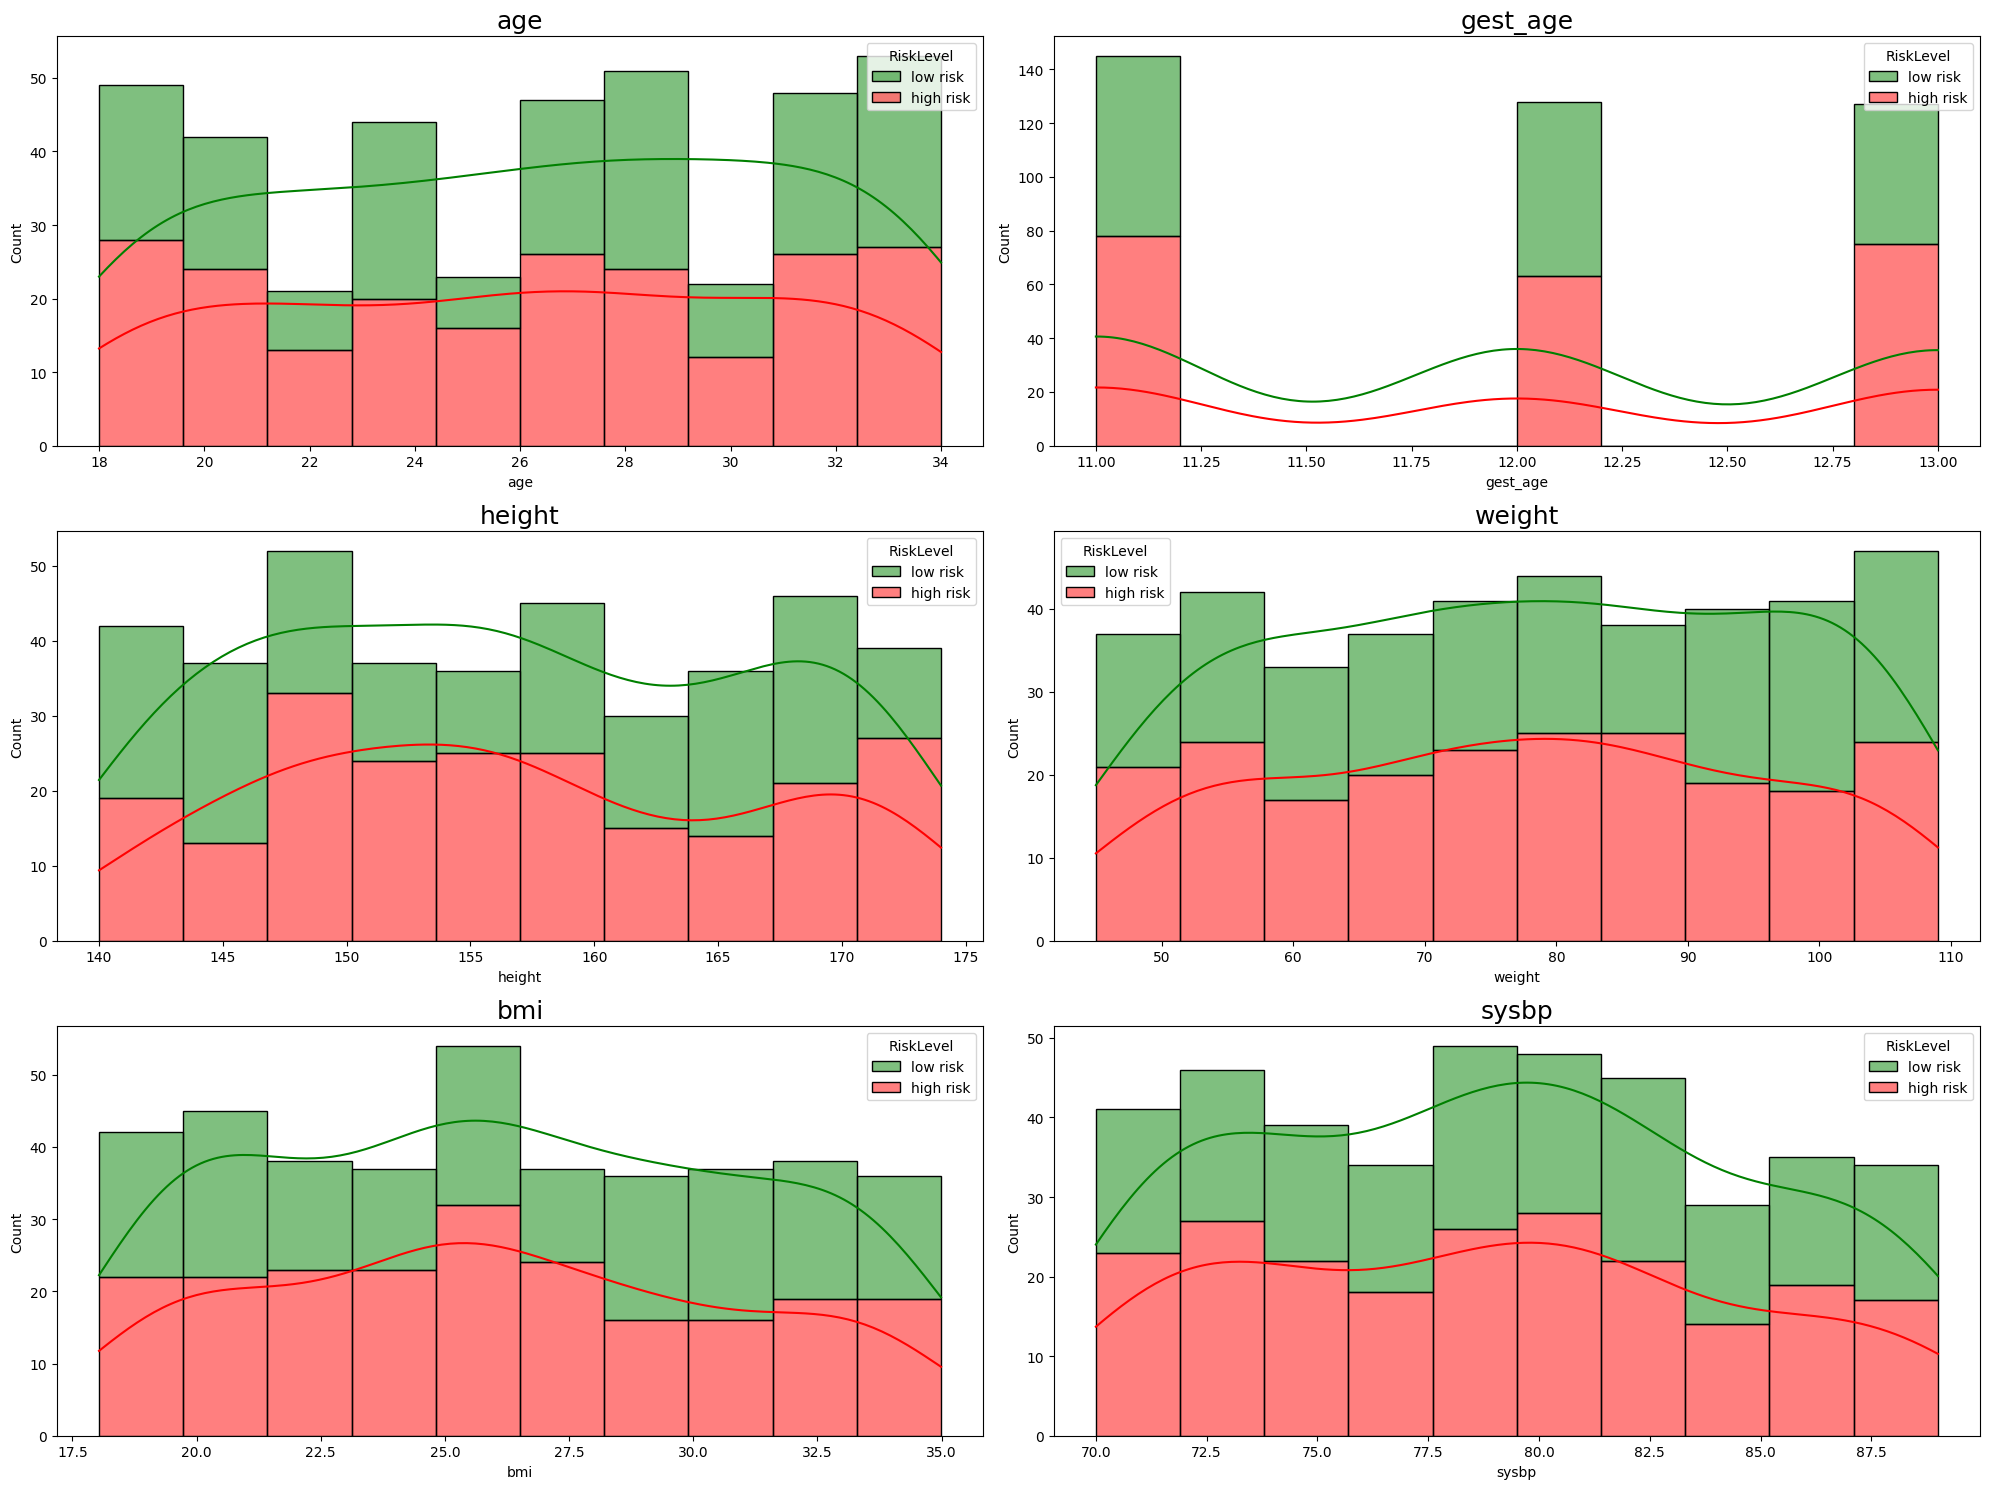

In [84]:
#Plotting stacked histograms for the feature variables
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))
# The 'htn'(ypertension, which is our primary predictor of Preeclampsia) column represents risk level with 0 indicating low risk and 1 indicating high risk
# Create a new column 'RiskLevel' based on the values in 'htn'
P_data['RiskLevel'] = P_data['htn'].map({0: 'low risk', 1: 'high risk'})

for ax, column in zip(axes.flatten(), P_data.columns):
    # Excluding the 'htn' column from the plotting to avoid redundancy
    if column != 'htn':
        sns.histplot(data=P_data,
                     x=column,
                     kde=True,
                     hue="RiskLevel",
                     multiple="stack",
                     palette={"low risk": "green",  "high risk": "red"},
                     element="bars", ax=ax)
        ax.set_title(f"{column}", fontsize=18)

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7db76d65a4d0> (for post_execute):


KeyboardInterrupt: 

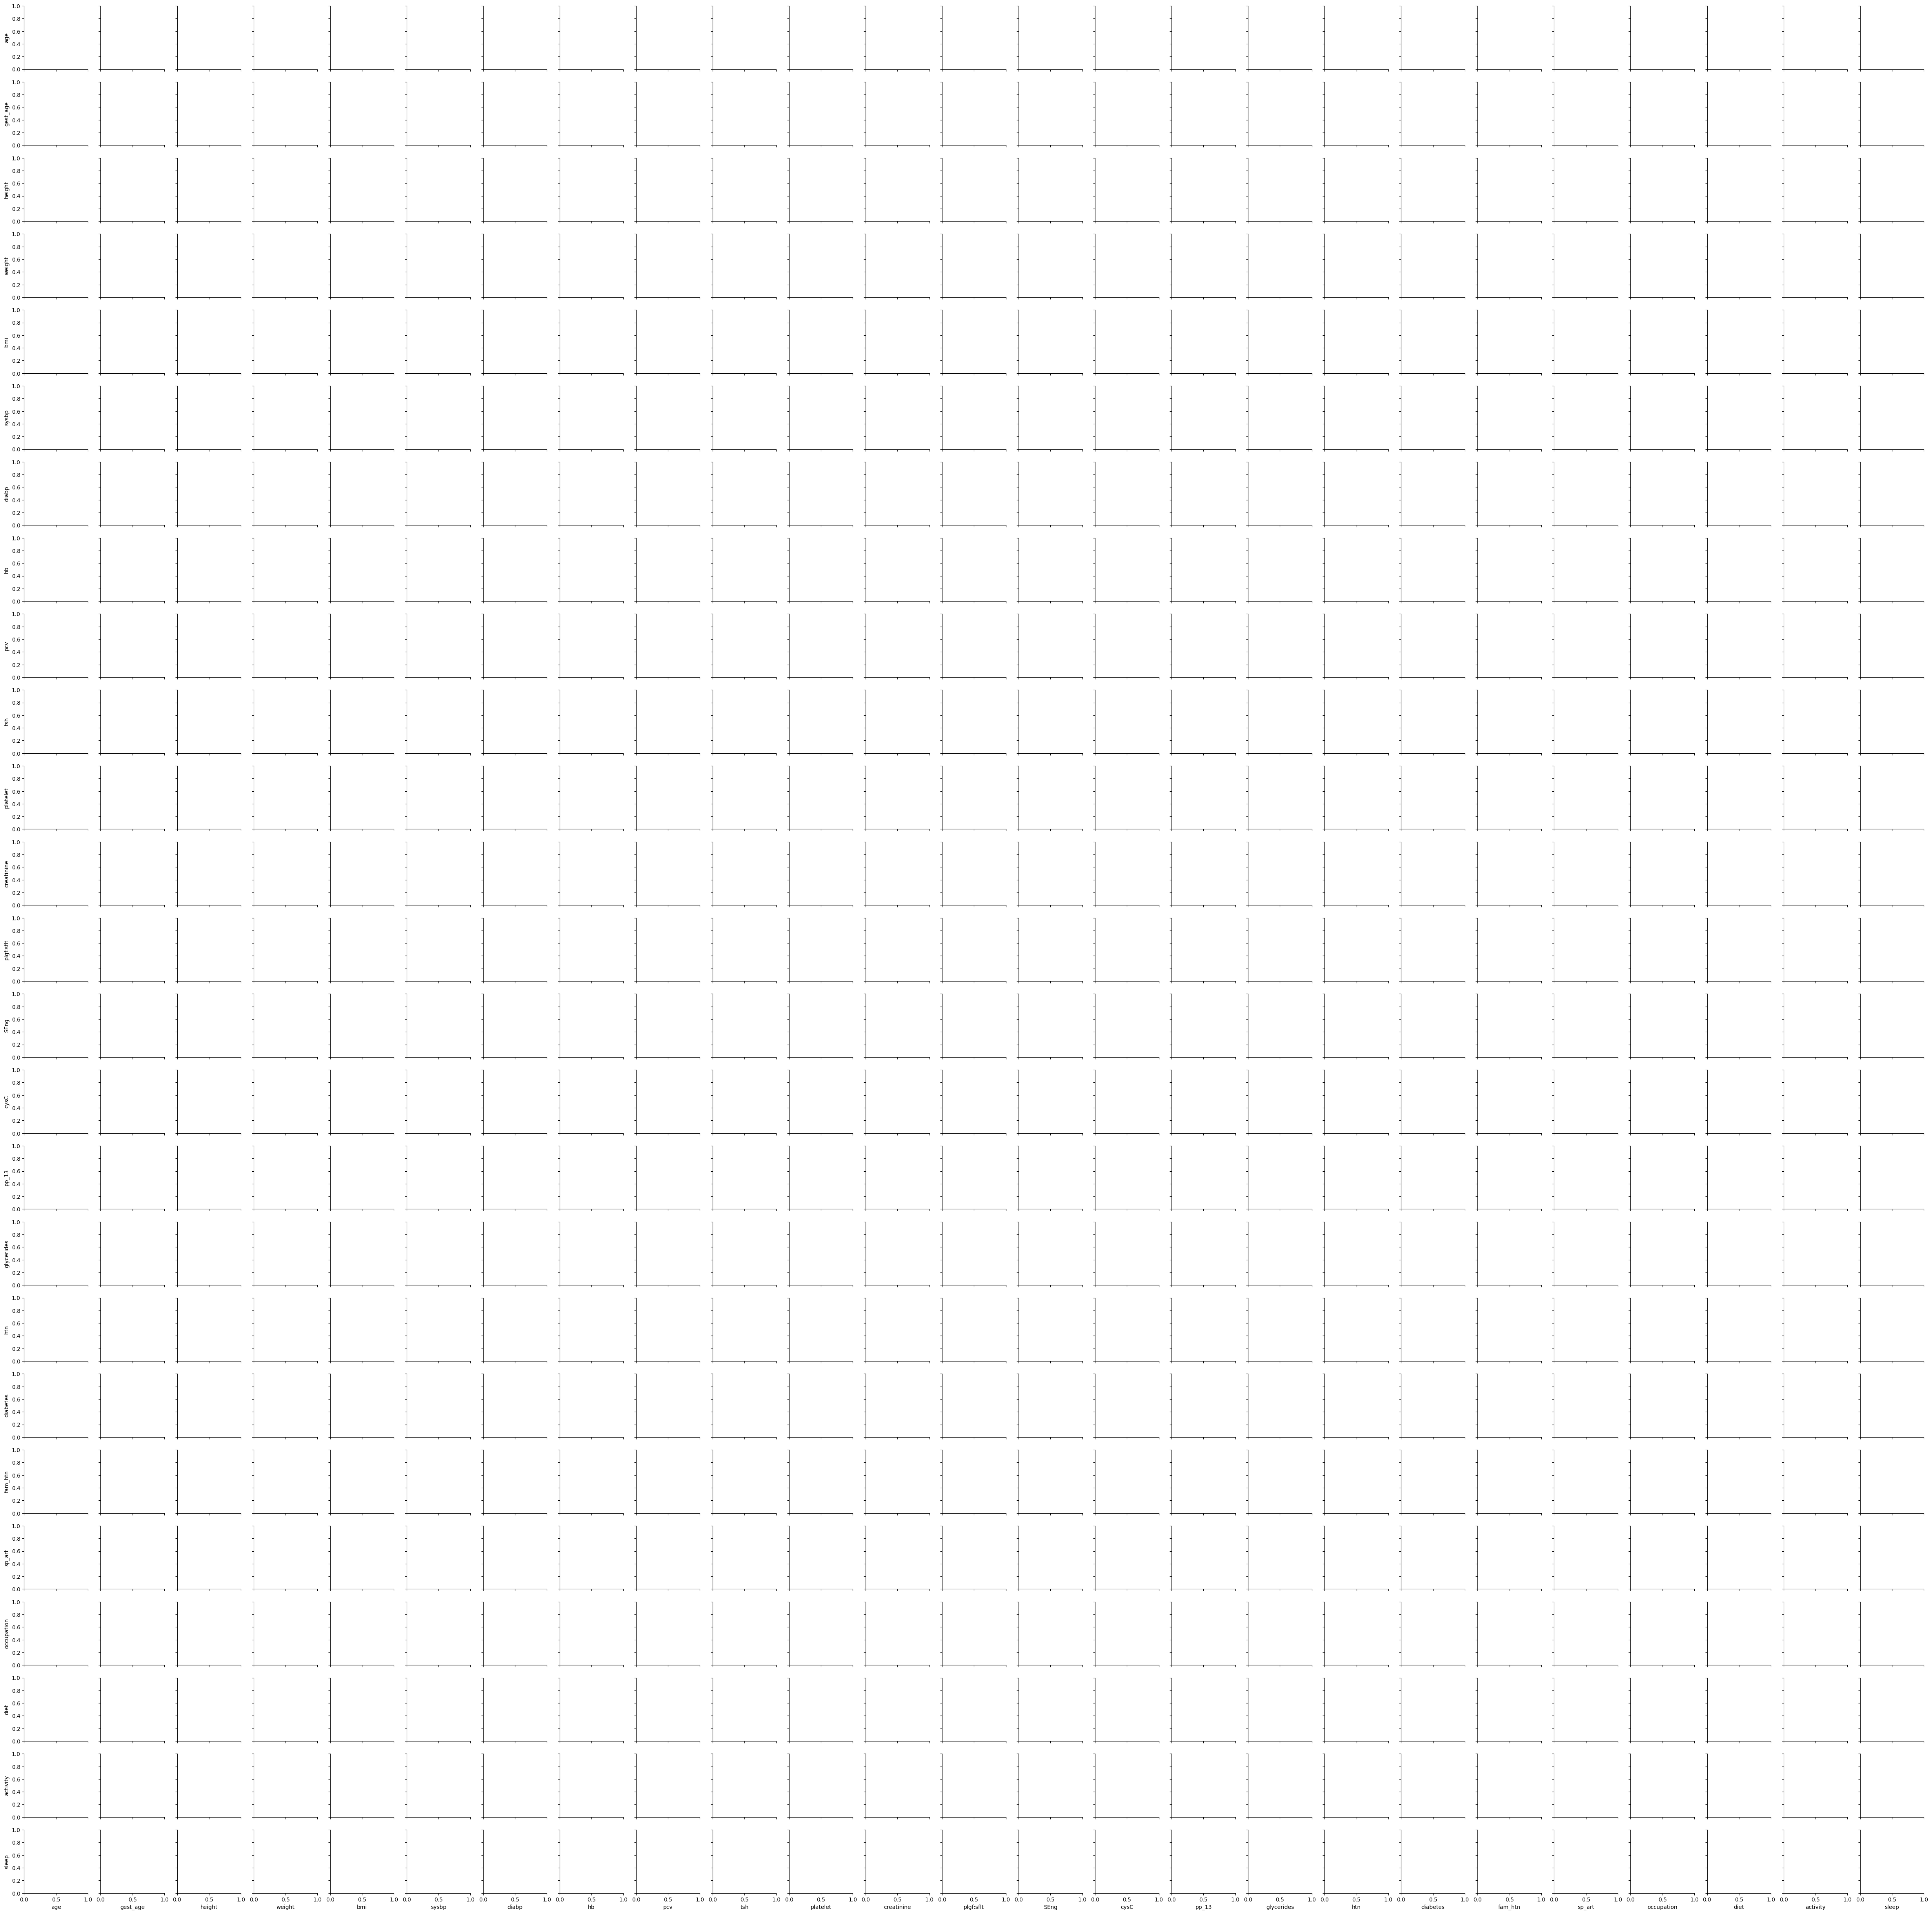

In [86]:
# Create a pairplot with risk levels
sns.pairplot(P_data, hue='RiskLevel', palette='Spectral')

# Add a title for the pairplot
plt.title('Pairplot with Risk Level')

# Show the plot
plt.show()

# Training The Predictive Model using support vector machine (svm)

Spliting the data and training the Test *Split*

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [67]:
print(X.shape, X_train.shape, X_test.shape)

(400, 24) (320, 24) (80, 24)


In [68]:
classifier = svm.SVC(kernel='linear')

In [69]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

# Model Evaluation

**Accuracy Score of the Train and Test datasets**

In [70]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [71]:
print('The Accuracy score of the training data is : ', training_data_accuracy)

The Accuracy score of the training data is :  0.625


In [72]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [73]:
print('The accuracy score of the test data is: ', test_data_accuracy)

The accuracy score of the test data is:  0.45


# Creating a Predictive Model

In [74]:
#Identifying the expected number of features directly from the model
num_features_expected = classifier.n_features_in_
#Adding zeros to the inou data to ensure the correct number of features in the model
input_data_padded = np.pad(input_data_as_numpy_array, (0, num_features_expected - len(input_data_as_numpy_array)), 'constant', constant_values=0)
#Reshaping the array to have the dimensions expected by the model
input_data_reshaped = input_data_padded.reshape(1, -1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person does not have Preeclampsia')
else:
  print('The person has Preeclampsia')

[0]
The person does not have Preeclampsia


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# Saving the Trained Model

In [75]:
import pickle

In [76]:
filename = 'trained_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [77]:
#loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [78]:
import numpy as np

#input data
input_data = classifier.n_features_in_

# changing the input_data to numpy array
# Reshape to a 1D array with one element
input_data_as_numpy_array = np.asarray(input_data).reshape(1)

input_data_padded = np.pad(input_data_as_numpy_array, (0, num_features_expected - input_data_as_numpy_array.shape[0]), 'constant', constant_values=0)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_padded.reshape(1,-1)  # Reshape using padded data

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person does not have Preeclampsia')
else:
  print('The person had Preeclampsia')

[0]
The person does not have Preeclampsia


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# Building  A Predictive Model using Logistic Regression